In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [2]:
#NOT USED

#Synthetic Task Functions
#generate target task and ood task taking the number of samples, the means, the standard deviation, and the OOD translation (only for ood)
#assuming equal class prior probability, meaning f_t_0 = f_t_1 = n; f_o_0 = f_o_1 = m

def generate_target_task(n, mu, sigma):
    f_t_0 = np.random.normal(loc = -mu, scale = sigma, size = n)
    f_t_1 = np.random.normal(loc = mu, scale = sigma, size = n)
    return f_t_0, f_t_1

def generate_ood_task(m, mu, sigma, delta):
    f_o_0 = np.random.normal(loc = delta-mu, scale = sigma, size = m)
    f_o_1 = np.random.normal(loc = delta+mu, scale = sigma, size = m)
    return f_o_0. f_o_1

In [3]:
#calculate the analytical expression target generalization error
def analytical_error(n, m, mu, sigma, delta):
    adjusted_mu = mu / sigma
    adjusted_delta = delta / sigma
    divisor = math.sqrt((n+m) * (n+m+1))
    return 1/2 * (norm.cdf((m * adjusted_delta - (n+m) * adjusted_mu) / divisor) + norm.cdf((-m * adjusted_delta - (n+m) * adjusted_mu) / divisor))
    

In [7]:
def plot_error_vs_ratio(n, mu, sigma):
    x = np.linspace(0.01, 2.00, 200)
    y = np.floor(x * n)
    translation = np.array([0, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8])
    for delta in translation:
        points = y.copy()
        i = 0
        for m in y:
            points[i] = analytical_error(n, m, mu, sigma, delta)
            i += 1
        rgb = (delta/3 + 0.2, delta/4, 1.0 - delta/2)
        plt.plot(x, points, label = "delta = " +  str(delta), color = rgb)

    plt.xlabel("m/n, n = 100")
    plt.xlim(0.0, 2.0)
    plt.xticks(np.linspace(0.0,2.0,6))
    plt.ylabel("Analytical Expected Target Ceneralization Error")
    plt.legend(loc = "upper left", title = "OOD Translation(Δ)", frameon = False)
    plt.grid()
    plt.title("\u03bc = 5, \u03C3 = 10")
    plt.show()
    

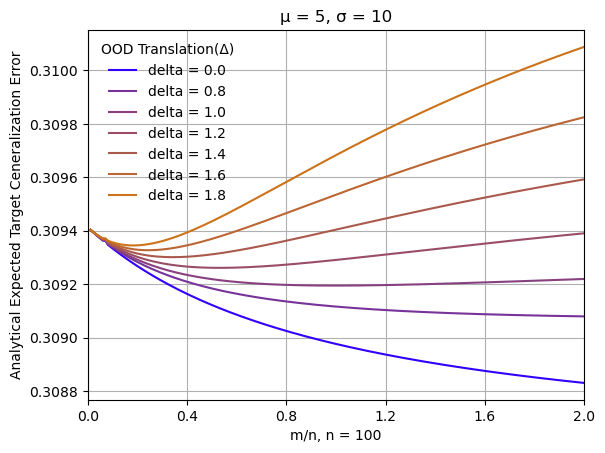

In [8]:
plot_error_vs_ratio(100 , 5 ,10)